In [1]:
%run StatTest2_WithSimulation_Setup.ipynb

{0: ['ME', 'IL', 'PA', 'GA', 'OK', 'DE', 'WA', 'CT', 'OH', 'VA', 'NE', 'MT', 'IN', 'CA', 'HI', 'ND', 'MD', 'SC', 'RI', 'AK', 'KY', 'WI', 'LA', 'MN', 'MS', 'WV', 'FL'], 1: ['SD', 'IL', 'PA', 'NH', 'NM', 'NV', 'OK', 'UT', 'CT', 'OH', 'VA', 'OR', 'CO', 'IN', 'HI', 'AL', 'RI', 'AK', 'LA', 'MN', 'IA', 'AR', 'WV'], 2: ['MI', 'ME', 'WY', 'DC', 'TX', 'AZ', 'NC', 'WA', 'OR', 'CO', 'MT', 'ND', 'TN', 'SC', 'AL', 'NY', 'KY', 'NJ', 'KS', 'ID', 'IA', 'AR', 'MO'], 3: ['MI', 'SD', 'WY', 'NH', 'DC', 'TX', 'GA', 'AZ', 'NM', 'NC', 'NV', 'DE', 'UT', 'NE', 'CA', 'MD', 'TN', 'NY', 'NJ', 'KS', 'WI', 'ID', 'MS', 'FL', 'MO']}
{0: ['MI', 'SD', 'WY', 'NH', 'DC', 'TX', 'AZ', 'NM', 'NC', 'NV', 'UT', 'OR', 'CO', 'TN', 'AL', 'NY', 'NJ', 'KS', 'ID', 'IA', 'AR', 'MO'], 1: ['MI', 'ME', 'WY', 'DC', 'TX', 'GA', 'AZ', 'NC', 'DE', 'WA', 'NE', 'MT', 'CA', 'ND', 'MD', 'TN', 'SC', 'NY', 'KY', 'NJ', 'KS', 'WI', 'ID', 'MS', 'FL', 'MO'], 2: ['SD', 'IL', 'PA', 'NH', 'GA', 'NM', 'NV', 'OK', 'DE', 'UT', 'CT', 'OH', 'VA', 'NE', 'IN'

In [2]:
data2014 = pd.read_csv("Our_Dataset/2014dataset.csv")
data2015 = pd.read_csv("Our_Dataset/2015dataset.csv")
data2016 = pd.read_csv("Our_Dataset/2016dataset.csv")
data2017 = pd.read_csv("Our_Dataset/2017dataset.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,52,323,649,882,932,1092,1202) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,57,204,341,376,377,396,430,431,928,944,1006,1013,1151,1160,1169,1179,1411) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,17,163,355,406,702,835,847,1083,1156,1183,1185,1200) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Create the labels.
# By index:
# label 2 is transfers
# label 3 is premiums
# label 4 is costs
# label 5 is member months
# label 6 is reinsurance (individual group only)

ind_labels_14 = ["HIOS ID", "HIOS INPUTTED INSURANCE COMPANY NAME",
                  "HHS RISK ADJUSTMENT TRANSFER AMOUNT (INDIVIDUAL MARKET, INCLUDING CATASTROPHIC)",
                  "1.1Directpremiumwritten2HealthInsuranceINDIVIDUALTotalasof3/31/15",
                  "2.16Totalincurredclaims2HealthInsuranceINDIVIDUALTotalasof3/31/15",
                  "7.4Membermonths2HealthInsuranceINDIVIDUALTotalasof3/31/15",
                  "STATE", "REINSURANCE PAYMENT AMOUNT (OR NOT ELIGIBLE)"] # no more reinsurance as of 2017
ind_labels_15 = [label.replace('15', '16') for label in ind_labels_14]
ind_labels_16 = [label.replace('15', '17') for label in ind_labels_14]
ind_labels_17 = [label.replace('15', '18') for label in ind_labels_14][:-1]

sg_labels_14 = ["HIOS ID", "HIOS INPUTTED INSURANCE COMPANY NAME",
                 "HHS RISK ADJUSTMENT TRANSFERS AMOUNT (SMALL GROUP MARKET)",
                  "1.1Directpremiumwritten7HealthInsuranceSMALLGROUPTotalasof3/31/15",
                  "2.16Totalincurredclaims7HealthInsuranceSMALLGROUPTotalasof3/31/15",
                  "7.4Membermonths7HealthInsuranceSMALLGROUPTotalasof3/31/15", "STATE"]
sg_labels_15 = [label.replace('15', '16') for label in sg_labels_14]
sg_labels_16 = [label.replace('15', '17') for label in sg_labels_14]
sg_labels_17 = [label.replace('15', '18') for label in sg_labels_14]

In [4]:
# Filter the data to include only the fields we want

ind_data_14 = data2014[ind_labels_14].dropna()
ind_data_15 = data2015[ind_labels_15].dropna()
ind_data_16 = data2016[ind_labels_16].dropna()
ind_data_17 = data2017[ind_labels_17].dropna()
sg_data_14 = data2014[sg_labels_14].dropna()
sg_data_15 = data2015[sg_labels_15].dropna()
sg_data_16 = data2016[sg_labels_16].dropna()
sg_data_17 = data2017[sg_labels_17].dropna()

In [5]:
# Drop companies with <2000 MM
ind_data_14 = ind_data_14.where(ind_data_14[ind_labels_14[5]] > 2000).dropna()
ind_data_15 = ind_data_15.where(ind_data_15[ind_labels_15[5]] > 2000).dropna()
ind_data_16 = ind_data_16.where(ind_data_16[ind_labels_16[5]] > 2000).dropna()
ind_data_17 = ind_data_17.where(ind_data_17[ind_labels_17[5]] > 2000).dropna()
sg_data_14 = sg_data_14.where(sg_data_14[sg_labels_14[5]] > 2000).dropna()
sg_data_15 = sg_data_15.where(sg_data_15[sg_labels_15[5]] > 2000).dropna()
sg_data_16 = sg_data_16.where(sg_data_16[sg_labels_16[5]] > 2000).dropna()
sg_data_17 = sg_data_17.where(sg_data_17[sg_labels_17[5]] > 2000).dropna()

In [6]:
# Calculate transfers, premiums, costs, and reinsurance (if individual group) per member month
def calculate_pmm(df, df_labels, group):
    df["MM"] = df[df_labels[5]]
    df["Transfers"] = df[df_labels[2]]
    df["TotalCosts"] = abs(df[df_labels[4]])
    df["Enrollees"] = df["MM"] / 12
    df["TransfersPerEnrollee"] = df["Transfers"] / df["Enrollees"]
    df["TransfersPerSqrtEnrollee"] = df["Transfers"] / np.sqrt(df["Enrollees"])
    df["LogEnrollees"] = np.log(df["Enrollees"])
    df["LogTransfers"] = np.log(df["Transfers"]**2 + 1)
    df["TransfersPMM"] = df[df_labels[2]] / df[df_labels[5]]
    df["PremiumsPMM"] = abs(df[df_labels[3]] / df[df_labels[5]])
    df["CostsPMM"] = abs(df[df_labels[4]] / df[df_labels[5]])
    if group == "i":
        df["ReinsurancePMM"] = df[df_labels[7]] / df[df_labels[5]]
        df["ProfitsPMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["TransfersPMM"] + df["ReinsurancePMM"]
        #df["PremMinusCostsPlusReinsurancePMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["ReinsurancePMM"]
    elif group == "sg":
        df["ProfitsPMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["TransfersPMM"]
    df["PremMinusCostsPMM"] = df["PremiumsPMM"] - df["CostsPMM"]
    df["PremMinusCostsPlusTransfersPMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["TransfersPMM"]
    df["SicknessPMM"] = df["CostsPMM"] - df["PremiumsPMM"]
    average_sickness = np.mean(df["SicknessPMM"])
    df["ExcessSicknessPMM"] = df["SicknessPMM"] - average_sickness
    return df

ind_data_14 = calculate_pmm(ind_data_14, ind_labels_14, "i")
ind_data_15 = calculate_pmm(ind_data_15, ind_labels_15, "i")
ind_data_16 = calculate_pmm(ind_data_16, ind_labels_16, "i")
ind_data_17 = calculate_pmm(ind_data_17, ind_labels_17, "sg")
sg_data_14 = calculate_pmm(sg_data_14, sg_labels_14, "sg")
sg_data_15 = calculate_pmm(sg_data_15, sg_labels_15, "sg")
sg_data_16 = calculate_pmm(sg_data_16, sg_labels_16, "sg")
sg_data_17 = calculate_pmm(sg_data_17, sg_labels_17, "sg")

In [7]:
# Combine the dataframes by left merging

ind_data = ind_data_14.merge(ind_data_15, on='HIOS ID', how='outer', suffixes=('_14', '_15'))\
.merge(ind_data_16, on='HIOS ID', how='outer').merge(ind_data_17, on='HIOS ID', how='outer', suffixes=('_16', '_17'))

In [8]:
# Do the same thing for small group

sg_data = sg_data_14.merge(sg_data_15, on='HIOS ID', how='outer', suffixes=('_14', '_15'))\
.merge(sg_data_16, on='HIOS ID', how='outer').merge(sg_data_17, on='HIOS ID', how='outer', suffixes=('_16', '_17'))

In [9]:
states = list(set(sg_data_14["STATE"]))
dfs = [sg_data_14, sg_data_15, sg_data_16, sg_data_17]

print_label = "Random States B"

In [10]:
dfs_new = normalize_empirical_data_split_randomly_for_years_2(dfs)

MI 14 Ratio is 1.308
SD 14 Ratio is 1.155
WY 14 Ratio is 1.016
NH 14 Ratio is 1.061
DC 14 Ratio is 1.139
TX 14 Ratio is 1.184
AZ 14 Ratio is 1.497
NM 14 Ratio is 1.142
NC 14 Ratio is 1.254
NV 14 Ratio is 1.365
UT 14 Ratio is 1.628
OR 14 Ratio is 1.208
CO 14 Ratio is 1.203
TN 14 Ratio is 1.447
AL 14 Ratio is 1.156
NY 14 Ratio is 0.973
NJ 14 Ratio is 1.173
KS 14 Ratio is 1.392
ID 14 Ratio is 1.484
IA 14 Ratio is 1.318
AR 14 Ratio is 1.473
MO 14 Ratio is 1.414
MI 15 Ratio is 1.250
ME 15 Ratio is 1.184
WY 15 Ratio is 0.973
DC 15 Ratio is 1.118
TX 15 Ratio is 1.086
GA 15 Ratio is 1.199
AZ 15 Ratio is 1.404
NC 15 Ratio is 1.180
DE 15 Ratio is 1.217
WA 15 Ratio is 1.156
NE 15 Ratio is 1.189
MT 15 Ratio is 1.100
CA 15 Ratio is 1.117
ND 15 Ratio is 1.096
MD 15 Ratio is 1.269
TN 15 Ratio is 1.385
SC 15 Ratio is 1.056
NY 15 Ratio is 0.896
KY 15 Ratio is 1.298
NJ 15 Ratio is 1.009
KS 15 Ratio is 1.229
WI 15 Ratio is 1.099
ID 15 Ratio is 1.432
MS 15 Ratio is 1.305
FL 15 Ratio is 1.162
MO 15 Ratio i

In [11]:
for df_temp in dfs_new:
    df_temp["TransfersNormalizedPerSqrtEnrollee"] = df_temp["TransfersNormalized"] / np.sqrt(df_temp["Enrollees"])

In [12]:
#dfs_new[3][["TransfersPerSqrtEnrollee", "TransfersNormalizedPerSqrtEnrollee"]]

In [13]:
df2 = create_df2(states, dfs_new, "TransfersNormalizedPerSqrtEnrollee")


In [14]:
k = len(df2)
v = np.linspace(0, max(abs(df2)), 10000)
v = v[1:len(v)]

ratios = [ratio_list(df2, vi) for vi in v]
#print(ratios)
begin_p = 5/k
end_p = 1-begin_p
start_index = 0
end_index = 0
for index, ratio2 in enumerate(ratios):
    if ratio2 >= begin_p:
        start_index = index
        break
    
for index, ratio2 in enumerate(ratios):
    if ratio2 > end_p:
        end_index = index
        break

if end_index == 0:
    end_index = len(v) - 1
    
v = v[start_index:end_index]

ratios2 = ratios[start_index:end_index]
multiplier = [np.sqrt(2)/vi for vi in v]
#plt.plot(v, ratios2)
#plt.plot(v, multiplier)

In [15]:
y = [multiplier[i] * special.erfinv(ratio2) for i, ratio2 in enumerate(ratios2)]
#plt.plot(v, y)
#plt.title("1/beta vs. v")
beta = [1/yi for yi in y]
#plt.plot(v, beta)
#plt.axvline(x=64432.69, color='r', linestyle='--', label="Point of max difference")
#plt.title("beta vs. v")

In [16]:
# Finding the minimum beta
# Whenever we reject a beta, we reject all betas greater than that,
# so keep pushing beta smaller until we reach max_difference == test_statistic
# Run test for larger data sizes (combining states, years)

In [17]:
max_beta=max(beta)
max_beta = int(max_beta/100)*100

beta = 92000.000


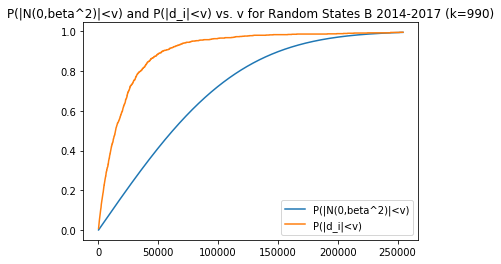

In [18]:
theoretical = [special.erf(vi/(max_beta*np.sqrt(2))) for vi in v]

plt.plot(v, theoretical, label="P(|N(0,beta^2)|<v)")
plt.plot(v, ratios2, label="P(|d_i|<v)")
plt.title("P(|N(0,beta^2)|<v) and P(|d_i|<v) vs. v for %s 2014-2017 (k=%d)" % (print_label, len(df2)))
#plt.axvline(x=64432.69, color='r', linestyle='--', label="Point of max difference")
plt.legend()
print("beta = %.3f" % (max_beta))

In [19]:
beta_theoretical, Mb_index = run_test_against_theoretical(df2, max_beta, ratios2, False)

k = 990
test_stat at this k = 0.03873

At the point of maximum difference with beta = 92000:
P(|d_i|<v) = 0.7838
P(|N(0,max_beta^2)|<v) = 0.2743
Difference = 0.5095




At the point of maximum difference with beta = 82000:
P(|d_i|<v) = 0.7828
P(|N(0,max_beta^2)|<v) = 0.3051
Difference = 0.4777




At the point of maximum difference with beta = 72000:
P(|d_i|<v) = 0.7828
P(|N(0,max_beta^2)|<v) = 0.3449
Difference = 0.4379




At the point of maximum difference with beta = 62000:
P(|d_i|<v) = 0.7253
P(|N(0,max_beta^2)|<v) = 0.3336
Difference = 0.3917




At the point of maximum difference with beta = 52000:
P(|d_i|<v) = 0.7253
P(|N(0,max_beta^2)|<v) = 0.3927
Difference = 0.3326




At the point of maximum difference with beta = 42000:
P(|d_i|<v) = 0.6960
P(|N(0,max_beta^2)|<v) = 0.4454
Difference = 0.2506




At the point of maximum difference with beta = 32000:
P(|d_i|<v) = 0.5131
P(|N(0,max_beta^2)|<v) = 0.3539
Difference = 0.1593




At the point of maximum difference with beta = 2200

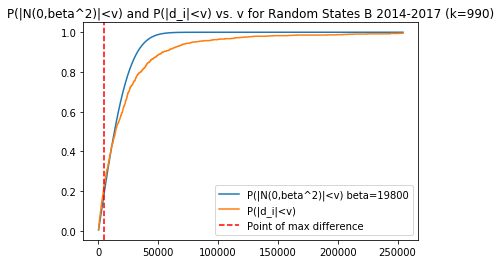

In [20]:
beta_theoretical = beta_theoretical+100

theoretical = [special.erf(vi/(beta_theoretical*np.sqrt(2))) for vi in v]

plt.plot(v, theoretical, label="P(|N(0,beta^2)|<v) beta=%d" % (beta_theoretical))
plt.plot(v, ratios2, label="P(|d_i|<v)")
plt.title("P(|N(0,beta^2)|<v) and P(|d_i|<v) vs. v for %s 2014-2017 (k=%d)" % (print_label, len(df2)))
plt.axvline(x=v[Mb_index], color='r', linestyle='--', label="Point of max difference")
plt.legend()
#plt.xlim(0, 50000)
#print("beta = %.3f" % (max_beta))

In [21]:
print("Theoretical Test Results")
run_binom_stat_test2(beta_theoretical, df2.values)

Theoretical Test Results
Beta (=std): 19800
Number of T/sqrt(n) above 2 stds: 166
Proportion of T/sqrt(n) above 2 stds: 0.168
P value = 0.000000


In [22]:
ratios_c, _ = create_simulation_adjust_for_imbalances(states, dfs_new, beta_theoretical - 10000)
ratios_c2, _ = create_simulation_adjust_for_imbalances(states, dfs_new, beta_theoretical)
ratios_c3, _ = create_simulation_adjust_for_imbalances(states, dfs_new, beta_theoretical + 10000)

Sum sqrt(a) = 103287.103
Sum sqrt(a) = 103287.103
Sum sqrt(a) = 103287.103


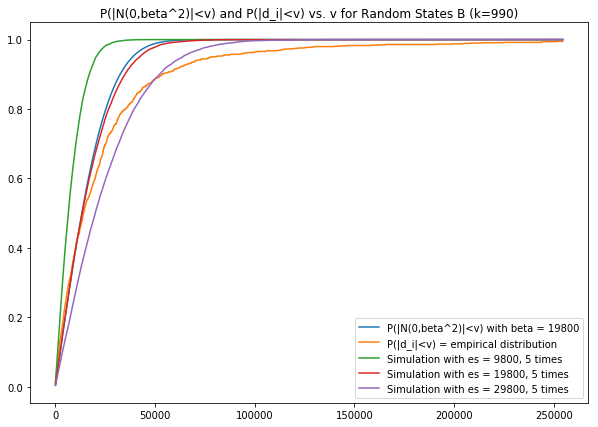

In [23]:
theoretical = [special.erf(vi/(beta_theoretical*np.sqrt(2))) for vi in v]

plt.figure(figsize=(10, 7))
plt.plot(v, theoretical, label="P(|N(0,beta^2)|<v) with beta = %d" % (beta_theoretical))
plt.plot(v, ratios2, label="P(|d_i|<v) = empirical distribution")
plt.plot(v, ratios_c, label="Simulation with es = %d, 5 times" % (beta_theoretical - 10000))
plt.plot(v, ratios_c2, label="Simulation with es = %d, 5 times" % (beta_theoretical))
plt.plot(v, ratios_c3, label="Simulation with es = %d, 5 times" % (beta_theoretical + 10000))
plt.title("P(|N(0,beta^2)|<v) and P(|d_i|<v) vs. v for %s (k=%d)" % (print_label, len(df2)))
plt.legend()

In [24]:
beta_sims = list()

for i in range(5):
    beta_sim, _= run_test_against_simulation(states, dfs_new, beta_theoretical, ratios2, False)
    beta_sims.append(beta_sim)

k = 990
test_stat at this k = 0.03873

At the point of maximum difference with beta = 23800:
P(|d_i|<v) = 0.4111
P(|N(0,max_beta^2)|<v) = 0.3300
Difference = 0.0811




At the point of maximum difference with beta = 23700:
P(|d_i|<v) = 0.2919
P(|N(0,max_beta^2)|<v) = 0.2110
Difference = 0.0809




At the point of maximum difference with beta = 23600:
P(|d_i|<v) = 0.4162
P(|N(0,max_beta^2)|<v) = 0.3337
Difference = 0.0824




At the point of maximum difference with beta = 23500:
P(|d_i|<v) = 0.4162
P(|N(0,max_beta^2)|<v) = 0.3250
Difference = 0.0912




At the point of maximum difference with beta = 23400:
P(|d_i|<v) = 0.2899
P(|N(0,max_beta^2)|<v) = 0.2081
Difference = 0.0818




At the point of maximum difference with beta = 23300:
P(|d_i|<v) = 0.2899
P(|N(0,max_beta^2)|<v) = 0.2092
Difference = 0.0807




At the point of maximum difference with beta = 23200:
P(|d_i|<v) = 0.4111
P(|N(0,max_beta^2)|<v) = 0.3293
Difference = 0.0818




At the point of maximum difference with beta = 2310


At the point of maximum difference with beta = 21900:
P(|d_i|<v) = 0.2919
P(|N(0,max_beta^2)|<v) = 0.2263
Difference = 0.0656




At the point of maximum difference with beta = 21800:
P(|d_i|<v) = 0.2707
P(|N(0,max_beta^2)|<v) = 0.2075
Difference = 0.0632




At the point of maximum difference with beta = 21700:
P(|d_i|<v) = 0.2919
P(|N(0,max_beta^2)|<v) = 0.2242
Difference = 0.0677




At the point of maximum difference with beta = 21600:
P(|d_i|<v) = 0.2919
P(|N(0,max_beta^2)|<v) = 0.2255
Difference = 0.0664




At the point of maximum difference with beta = 21500:
P(|d_i|<v) = 0.2919
P(|N(0,max_beta^2)|<v) = 0.2350
Difference = 0.0569




At the point of maximum difference with beta = 21400:
P(|d_i|<v) = 0.2899
P(|N(0,max_beta^2)|<v) = 0.2258
Difference = 0.0641




At the point of maximum difference with beta = 21300:
P(|d_i|<v) = 0.2919
P(|N(0,max_beta^2)|<v) = 0.2323
Difference = 0.0596




At the point of maximum difference with beta = 21200:
P(|d_i|<v) = 0.2707
P(|N(0,max_beta


At the point of maximum difference with beta = 20300:
P(|d_i|<v) = 0.2152
P(|N(0,max_beta^2)|<v) = 0.1646
Difference = 0.0506




At the point of maximum difference with beta = 20200:
P(|d_i|<v) = 0.2707
P(|N(0,max_beta^2)|<v) = 0.2232
Difference = 0.0475




At the point of maximum difference with beta = 20100:
P(|d_i|<v) = 0.2152
P(|N(0,max_beta^2)|<v) = 0.1679
Difference = 0.0473




At the point of maximum difference with beta = 20000:
P(|d_i|<v) = 0.2172
P(|N(0,max_beta^2)|<v) = 0.1737
Difference = 0.0434




At the point of maximum difference with beta = 19900:
P(|d_i|<v) = 0.2616
P(|N(0,max_beta^2)|<v) = 0.2167
Difference = 0.0449




At the point of maximum difference with beta = 19800:
P(|d_i|<v) = 0.2707
P(|N(0,max_beta^2)|<v) = 0.2223
Difference = 0.0484




At the point of maximum difference with beta = 19700:
P(|d_i|<v) = 0.2707
P(|N(0,max_beta^2)|<v) = 0.2226
Difference = 0.0481




At the point of maximum difference with beta = 19600:
P(|d_i|<v) = 0.2707
P(|N(0,max_beta


At the point of maximum difference with beta = 22900:
P(|d_i|<v) = 0.2919
P(|N(0,max_beta^2)|<v) = 0.2170
Difference = 0.0749




At the point of maximum difference with beta = 22800:
P(|d_i|<v) = 0.2899
P(|N(0,max_beta^2)|<v) = 0.2176
Difference = 0.0723




At the point of maximum difference with beta = 22700:
P(|d_i|<v) = 0.2919
P(|N(0,max_beta^2)|<v) = 0.2158
Difference = 0.0761




At the point of maximum difference with beta = 22600:
P(|d_i|<v) = 0.2919
P(|N(0,max_beta^2)|<v) = 0.2205
Difference = 0.0714




At the point of maximum difference with beta = 22500:
P(|d_i|<v) = 0.2919
P(|N(0,max_beta^2)|<v) = 0.2188
Difference = 0.0731




At the point of maximum difference with beta = 22400:
P(|d_i|<v) = 0.2919
P(|N(0,max_beta^2)|<v) = 0.2253
Difference = 0.0667




At the point of maximum difference with beta = 22300:
P(|d_i|<v) = 0.2919
P(|N(0,max_beta^2)|<v) = 0.2196
Difference = 0.0723




At the point of maximum difference with beta = 22200:
P(|d_i|<v) = 0.2707
P(|N(0,max_beta

In [25]:
print("Simulation without Adjustment Test Results")
run_binom_stat_test2(np.mean(beta_sims), df2.values)
run_binom_stat_test3(np.mean(beta_sims), df2.values)

Simulation without Adjustment Test Results
Beta (=std): 19340
Number of T/sqrt(n) above 2 stds: 176
Proportion of T/sqrt(n) above 2 stds: 0.178
P value = 0.000000
Beta (=std): 19340
Number of T/sqrt(n) above 3 stds: 92
Proportion of T/sqrt(n) above 3 stds: 0.093
P value = 0.000000


In [26]:
beta_sim_adjs = list()

for i in range(5):
    beta_sim_adj, _= run_test_against_simulation_adjust_for_imbalances(states, dfs_new,
                                                                   beta_theoretical, ratios2, False)
    beta_sim_adjs.append(beta_sim_adj)

k = 990
test_stat at this k = 0.03873
Sum sqrt(a) = 103287.103

At the point of maximum difference with beta = 23800:
P(|d_i|<v) = 0.2919
P(|N(0,max_beta^2)|<v) = 0.2181
Difference = 0.0738



Sum sqrt(a) = 103287.103

At the point of maximum difference with beta = 23700:
P(|d_i|<v) = 0.2919
P(|N(0,max_beta^2)|<v) = 0.2180
Difference = 0.0739



Sum sqrt(a) = 103287.103

At the point of maximum difference with beta = 23600:
P(|d_i|<v) = 0.2919
P(|N(0,max_beta^2)|<v) = 0.2213
Difference = 0.0706



Sum sqrt(a) = 103287.103

At the point of maximum difference with beta = 23500:
P(|d_i|<v) = 0.2899
P(|N(0,max_beta^2)|<v) = 0.2174
Difference = 0.0725



Sum sqrt(a) = 103287.103

At the point of maximum difference with beta = 23400:
P(|d_i|<v) = 0.2596
P(|N(0,max_beta^2)|<v) = 0.1878
Difference = 0.0718



Sum sqrt(a) = 103287.103

At the point of maximum difference with beta = 23300:
P(|d_i|<v) = 0.2707
P(|N(0,max_beta^2)|<v) = 0.2045
Difference = 0.0662



Sum sqrt(a) = 103287.103

At the

Sum sqrt(a) = 103287.103

At the point of maximum difference with beta = 21700:
P(|d_i|<v) = 0.2192
P(|N(0,max_beta^2)|<v) = 0.1706
Difference = 0.0486



Sum sqrt(a) = 103287.103

At the point of maximum difference with beta = 21600:
P(|d_i|<v) = 0.2596
P(|N(0,max_beta^2)|<v) = 0.2118
Difference = 0.0478



Sum sqrt(a) = 103287.103

At the point of maximum difference with beta = 21500:
P(|d_i|<v) = 0.2313
P(|N(0,max_beta^2)|<v) = 0.1796
Difference = 0.0517



Sum sqrt(a) = 103287.103

At the point of maximum difference with beta = 21400:
P(|d_i|<v) = 0.2707
P(|N(0,max_beta^2)|<v) = 0.2252
Difference = 0.0455



Sum sqrt(a) = 103287.103

At the point of maximum difference with beta = 21300:
P(|d_i|<v) = 0.2707
P(|N(0,max_beta^2)|<v) = 0.2220
Difference = 0.0487



Sum sqrt(a) = 103287.103

At the point of maximum difference with beta = 21200:
P(|d_i|<v) = 0.2152
P(|N(0,max_beta^2)|<v) = 0.1706
Difference = 0.0446



Sum sqrt(a) = 103287.103

At the point of maximum difference with beta

Sum sqrt(a) = 103287.103

At the point of maximum difference with beta = 23300:
P(|d_i|<v) = 0.2899
P(|N(0,max_beta^2)|<v) = 0.2220
Difference = 0.0679



Sum sqrt(a) = 103287.103

At the point of maximum difference with beta = 23200:
P(|d_i|<v) = 0.2707
P(|N(0,max_beta^2)|<v) = 0.2028
Difference = 0.0679



Sum sqrt(a) = 103287.103

At the point of maximum difference with beta = 23100:
P(|d_i|<v) = 0.2707
P(|N(0,max_beta^2)|<v) = 0.2019
Difference = 0.0688



Sum sqrt(a) = 103287.103

At the point of maximum difference with beta = 23000:
P(|d_i|<v) = 0.4111
P(|N(0,max_beta^2)|<v) = 0.3448
Difference = 0.0663



Sum sqrt(a) = 103287.103

At the point of maximum difference with beta = 22900:
P(|d_i|<v) = 0.2919
P(|N(0,max_beta^2)|<v) = 0.2282
Difference = 0.0637



Sum sqrt(a) = 103287.103

At the point of maximum difference with beta = 22800:
P(|d_i|<v) = 0.2919
P(|N(0,max_beta^2)|<v) = 0.2263
Difference = 0.0656



Sum sqrt(a) = 103287.103

At the point of maximum difference with beta

Sum sqrt(a) = 103287.103

At the point of maximum difference with beta = 21300:
P(|d_i|<v) = 0.2899
P(|N(0,max_beta^2)|<v) = 0.2405
Difference = 0.0494



Sum sqrt(a) = 103287.103

At the point of maximum difference with beta = 21200:
P(|d_i|<v) = 0.2707
P(|N(0,max_beta^2)|<v) = 0.2213
Difference = 0.0494



Sum sqrt(a) = 103287.103

At the point of maximum difference with beta = 21100:
P(|d_i|<v) = 0.2596
P(|N(0,max_beta^2)|<v) = 0.2165
Difference = 0.0431



Sum sqrt(a) = 103287.103

At the point of maximum difference with beta = 21000:
P(|d_i|<v) = 0.2707
P(|N(0,max_beta^2)|<v) = 0.2226
Difference = 0.0481



Sum sqrt(a) = 103287.103

At the point of maximum difference with beta = 20900:
P(|d_i|<v) = 0.2707
P(|N(0,max_beta^2)|<v) = 0.2267
Difference = 0.0440



Sum sqrt(a) = 103287.103

At the point of maximum difference with beta = 20800:
P(|d_i|<v) = 0.2152
P(|N(0,max_beta^2)|<v) = 0.1704
Difference = 0.0448



Sum sqrt(a) = 103287.103

At the point of maximum difference with beta

In [27]:
print("Simulation WITH Adjustment Test Results")
run_binom_stat_test2(np.mean(beta_sim_adjs), df2.values)
run_binom_stat_test3(np.mean(beta_sim_adjs), df2.values)

Simulation WITH Adjustment Test Results
Beta (=std): 20500
Number of T/sqrt(n) above 2 stds: 154
Proportion of T/sqrt(n) above 2 stds: 0.156
P value = 0.000000
Beta (=std): 20500
Number of T/sqrt(n) above 3 stds: 82
Proportion of T/sqrt(n) above 3 stds: 0.083
P value = 0.000000


In [28]:
print("Theoretical Test Results")
run_binom_stat_test2(beta_theoretical, df2.values)
run_binom_stat_test3(beta_theoretical, df2.values)
print("\n")
print("Simulation without Adjustment Test Results")
run_binom_stat_test2(np.mean(beta_sims), df2.values)
run_binom_stat_test3(np.mean(beta_sims), df2.values)
print("\n")
print("Simulation WITH Adjustment Test Results")
run_binom_stat_test2(np.mean(beta_sim_adjs), df2.values)
run_binom_stat_test3(np.mean(beta_sim_adjs), df2.values)

Theoretical Test Results
Beta (=std): 19800
Number of T/sqrt(n) above 2 stds: 166
Proportion of T/sqrt(n) above 2 stds: 0.168
P value = 0.000000
Beta (=std): 19800
Number of T/sqrt(n) above 3 stds: 89
Proportion of T/sqrt(n) above 3 stds: 0.090
P value = 0.000000


Simulation without Adjustment Test Results
Beta (=std): 19340
Number of T/sqrt(n) above 2 stds: 176
Proportion of T/sqrt(n) above 2 stds: 0.178
P value = 0.000000
Beta (=std): 19340
Number of T/sqrt(n) above 3 stds: 92
Proportion of T/sqrt(n) above 3 stds: 0.093
P value = 0.000000


Simulation WITH Adjustment Test Results
Beta (=std): 20500
Number of T/sqrt(n) above 2 stds: 154
Proportion of T/sqrt(n) above 2 stds: 0.156
P value = 0.000000
Beta (=std): 20500
Number of T/sqrt(n) above 3 stds: 82
Proportion of T/sqrt(n) above 3 stds: 0.083
P value = 0.000000
